# Phần 1. Tổng quan tập dữ liệu

1. Nhập các thư viện cần thiết

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, LinearSVC
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

2. Nhập tập dữ liệu

In [48]:
df = pd.read_csv('heart.csv')

3. Tìm hiểu dữ liệu

3.1 In ra 5 dòng đầu của tập dữ liệu

In [49]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,typical angina,145,233,True,hypertrophy,150,no,2.30,downsloping,0,fixed defect,more chance of heart attack
1,37,male,non-anginal pain,130,250,False,normal,187,no,3.50,downsloping,0,normal,more chance of heart attack
2,41,female,atypical angina,130,204,False,hypertrophy,172,no,1.40,upsloping,0,normal,more chance of heart attack
3,56,male,atypical angina,120,236,False,normal,178,no,0.80,upsloping,0,normal,more chance of heart attack
4,57,female,asymptomatic,120,354,False,normal,163,yes,0.60,upsloping,0,normal,more chance of heart attack


3.2 Thông tin tập dữ liệu

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    object 
 11  caa       303 non-null    int64  
 12  thall     301 non-null    object 
 13  output    303 non-null    object 
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 31.2+ KB


3.3 Kiểm tra số lượng giá trị duy nhất trong mỗi cột

In [51]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


3.4 Tách các cột theo phân loại và liên tục

⭐ Chia các cột dữ liệu thành các biến phân loại và biến liên tục

In [52]:
cat_cols = ['sex','cp','fbs','restecg','exng', 'slp', 'caa','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


⭐ Biểu đồ biến mục tiêu

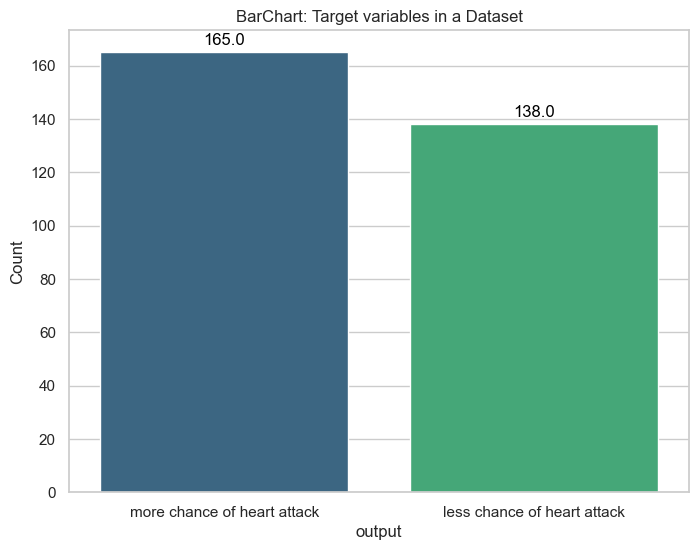

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is defined as in your code
x = df[target_col].value_counts()



# Set seaborn style with grid
sns.set(style="whitegrid")

# Plot the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="output", palette="viridis")

# Add text labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel("output")
plt.ylabel("Count")
plt.title("BarChart: Target variables in a Dataset")

# Show the plot
plt.show()


⭐ Biểu đồ các biến phân loại trong tập dữ liệu

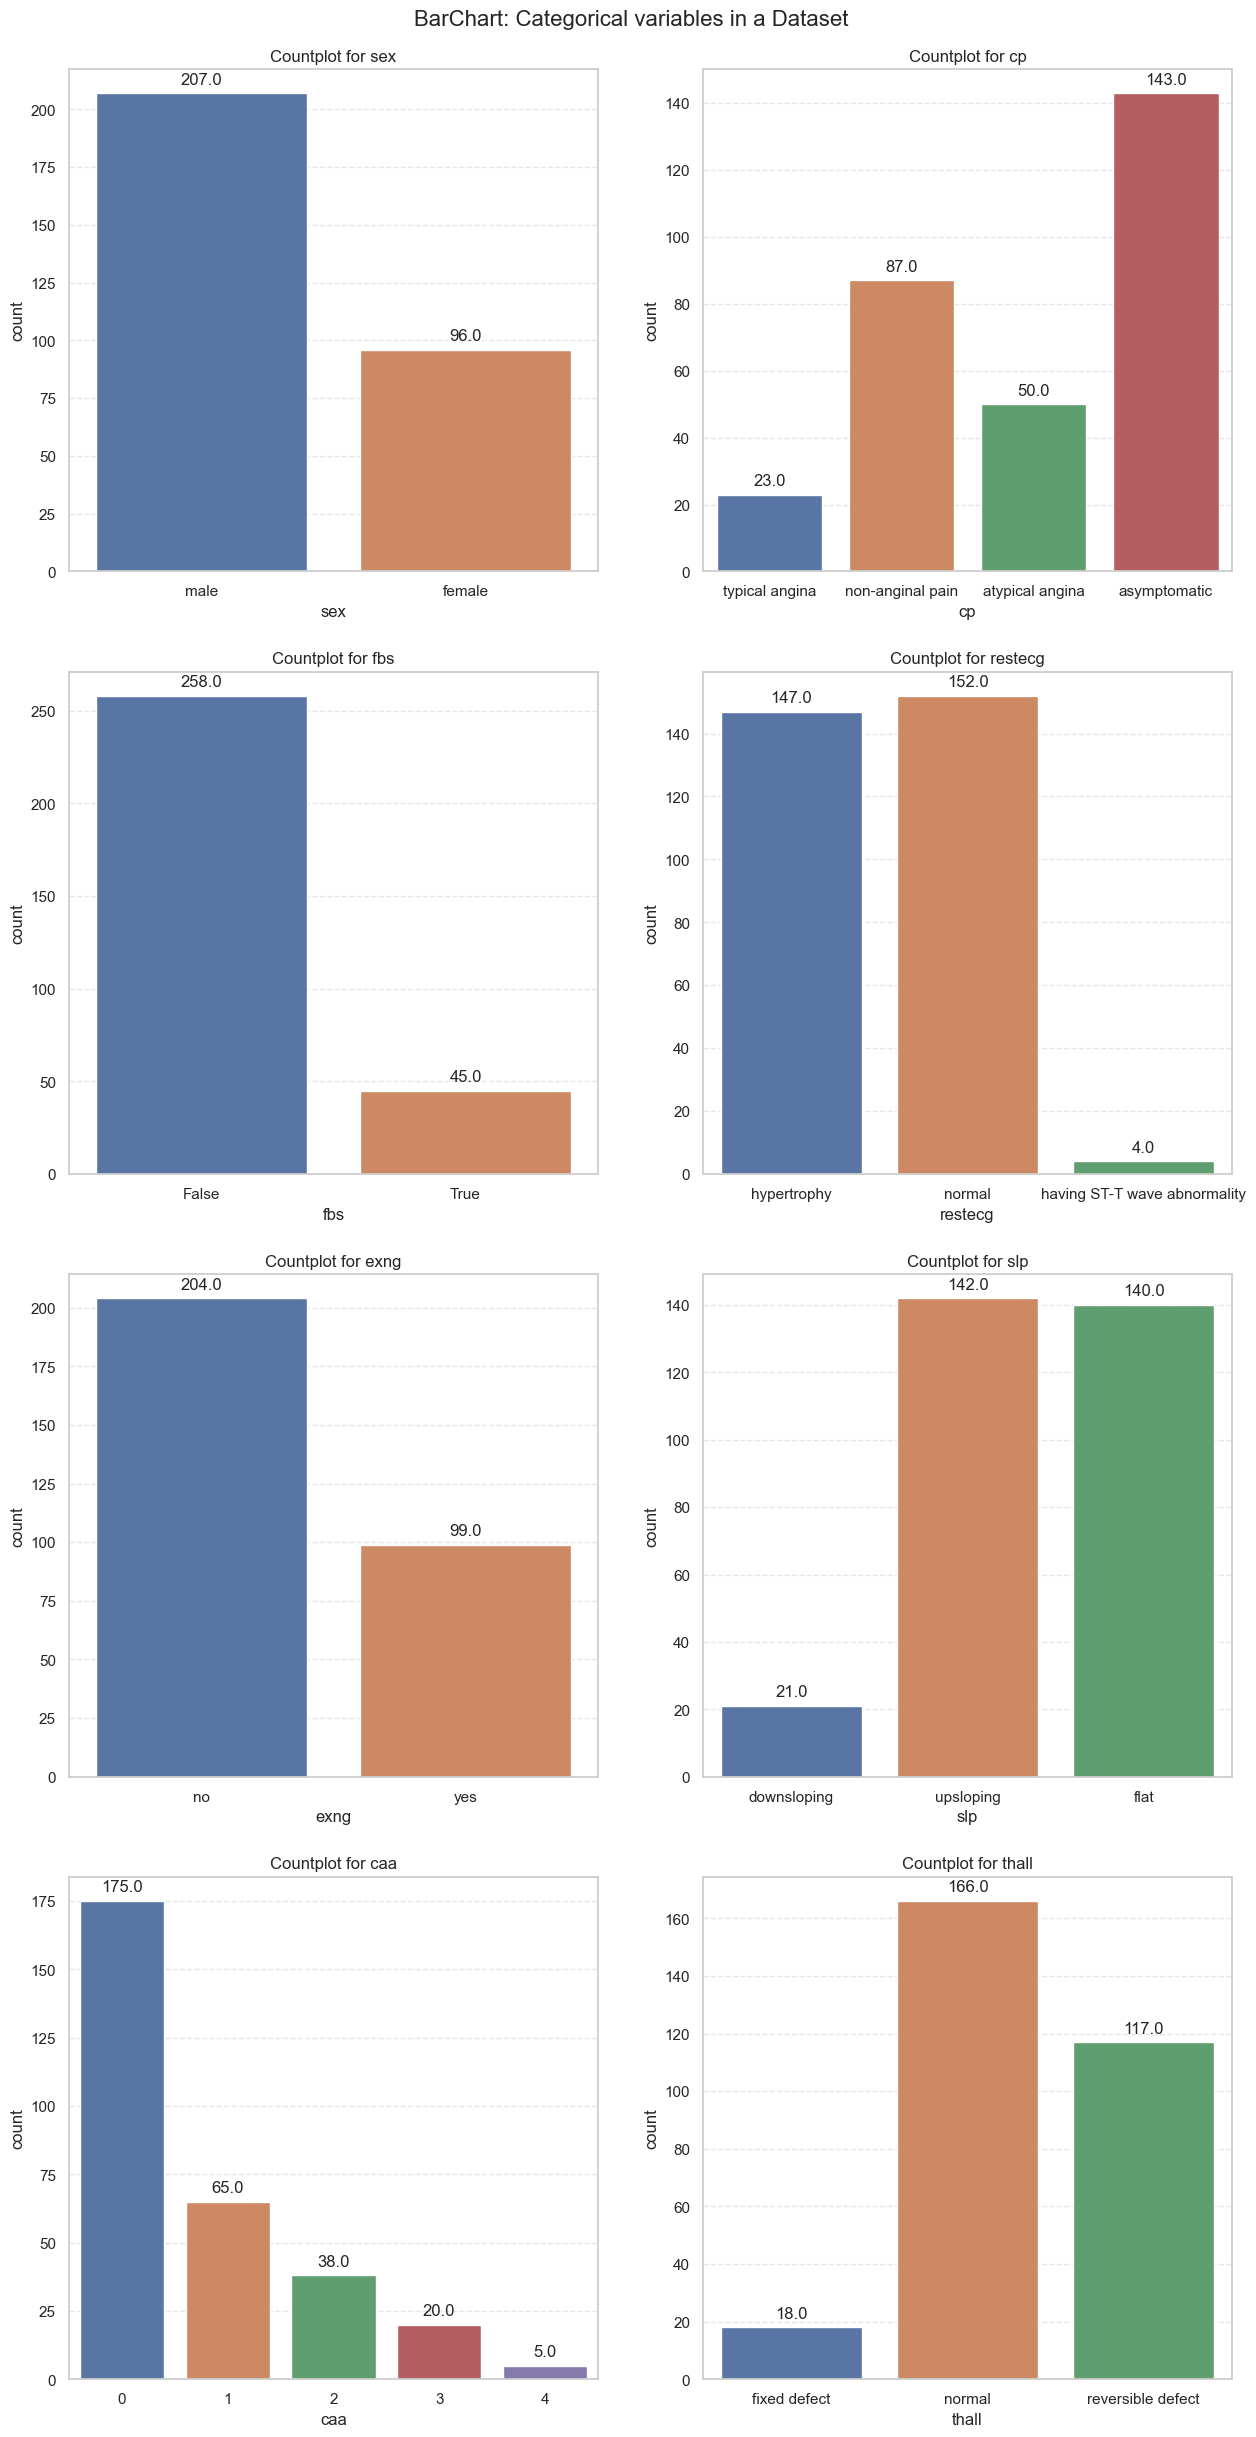

In [54]:
# Tạo subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30))

# Duyệt qua các cột và vẽ countplot


for i, ax in zip(df[cat_cols].columns, axes.flatten()):
    sns.countplot(x=i, data=df[cat_cols], ax=ax)
    ax.set_title(f'Countplot for {i}')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Thêm lưới ngang
    for row in axes:
        for ax in row:
            ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("BarChart: Categorical variables in a Dataset", y=0.9, fontsize=16)  # Thêm tiêu đề chung
plt.show()

⭐ Biểu đồ các biến liên tục trong tập dữ liệu

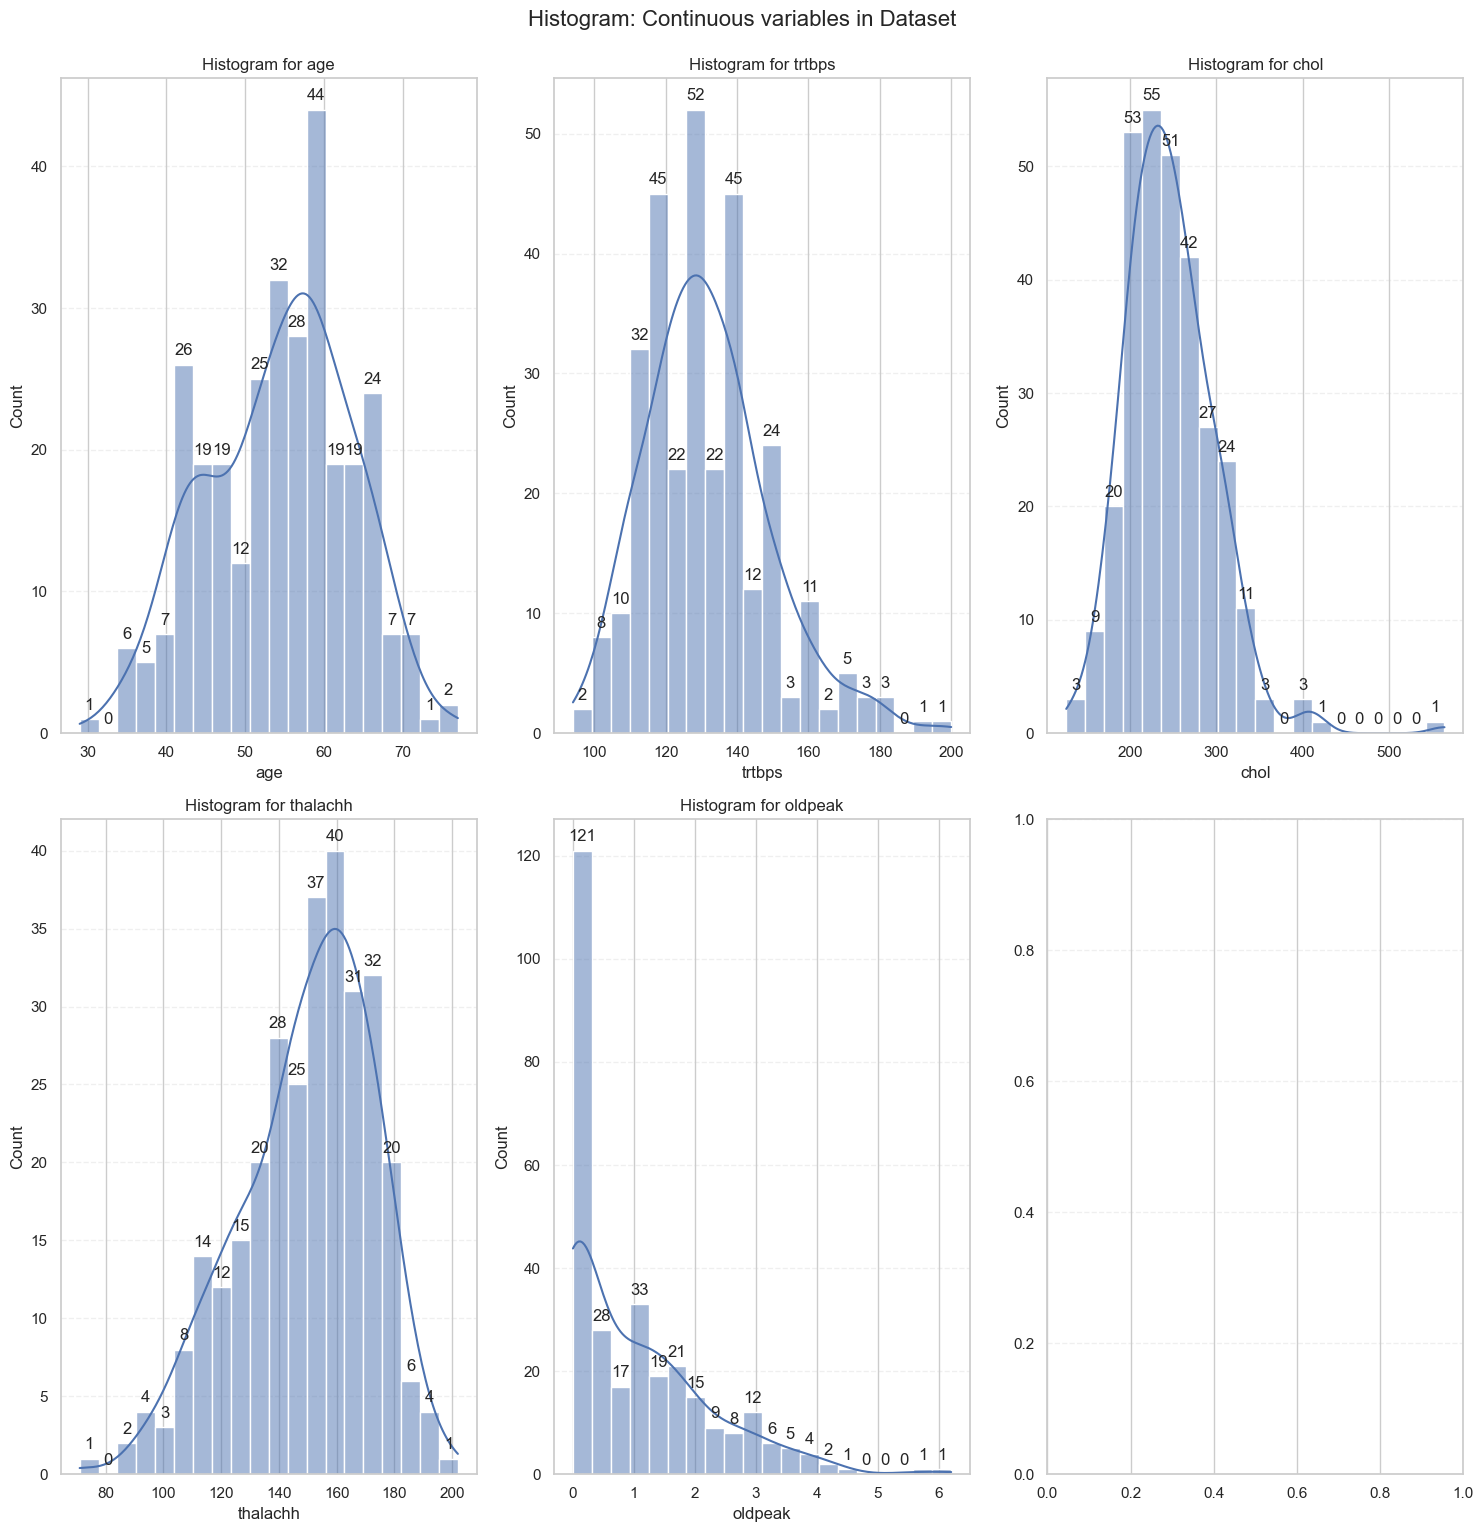

In [55]:
# Tạo subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Duyệt qua các cột và vẽ histogram
for col, ax in zip(con_cols, axes.flatten()):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram for {col}')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Thêm lưới ngang
    for row in axes:
        for ax in row:
            ax.yaxis.grid(True, linestyle='--', alpha=0.3)

# Tự chỉnh layout
plt.tight_layout()
plt.suptitle("Histogram: Continuous variables in Dataset", y=1.02, fontsize=16)  # Thêm tiêu đề chung
plt.show()

⭐ Biểu đồ kiểm tra giá trị ngoại lệ trong tập dữ liệu

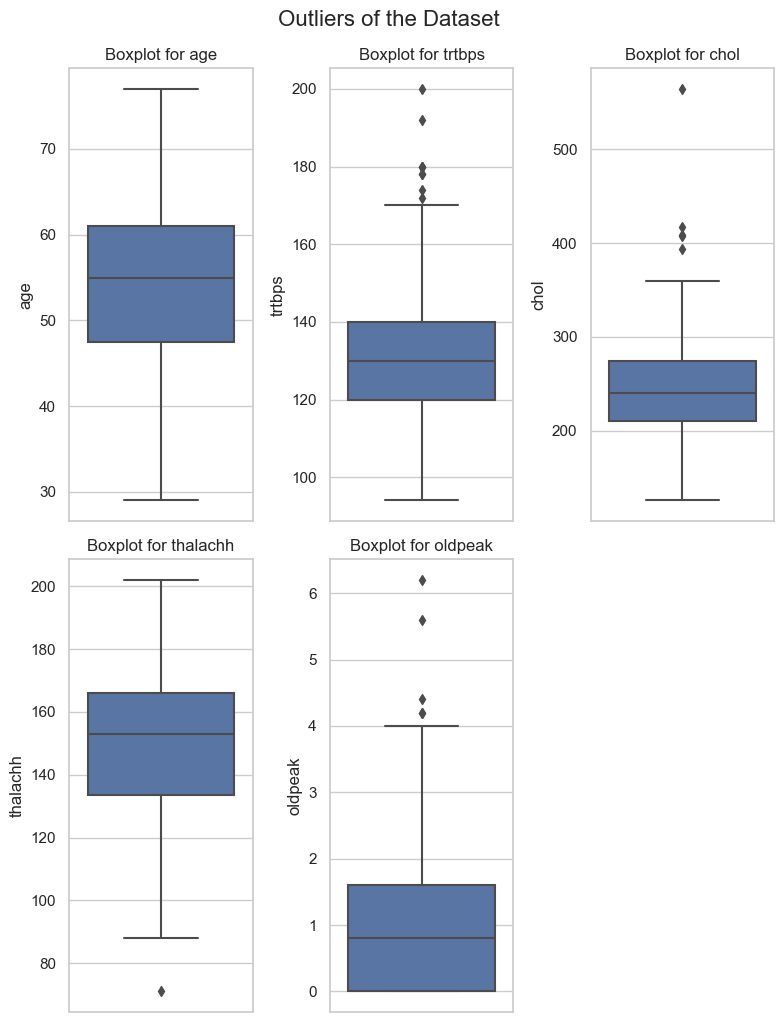

In [56]:
plt.figure(figsize=(8, 10))

for i, column in enumerate(df[con_cols], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.suptitle("Outliers of the Dataset ", y=1.02, fontsize=16)  # Thêm tiêu đề chung
plt.show()

3.5 Kiểm tra giá trị NaN

In [57]:
# Kiểm tra giá trị NaN
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       2
output      0
dtype: int64

# Phần 2: Tiền xử lý dữ liệu

2.1 Kiểm tra và xử lý những giá trị trùng lặp

In [58]:
# Kiểm tra các giá trị trùng lặp
df.duplicated().sum()

1

In [59]:
# In ra cột chứa giá trị trùng lặp
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,male,non-anginal pain,138,175,False,normal,173,no,0.00,upsloping,4,normal,more chance of heart attack


In [60]:
# Loại bỏ các dòng chứa giá trị trùng lặp
df = df.drop_duplicates()

In [61]:
# Kiểm tra lại
df.duplicated().sum()

0

2.2 Xử lý giá trị NaN

In [62]:
# Loại bỏ giá trị NaN
df = df.dropna()

In [63]:
# Kiểm tra lại
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

2.3 Chuyển đổi dữ liệu

In [64]:
df['sex'].replace({'male': 1, 'female': 0}, inplace=True)
df['cp'].replace({'asymptomatic': 0, 'atypical angina': 1, 'non-anginal pain': 2, 'typical angina': 3}, inplace=True)
df['restecg'].replace({'hypertrophy': 0, 'normal': 1, 'having ST-T wave abnormality': 2}, inplace=True)
df['fbs'].replace({True: 1, False: 0}, inplace=True)
df['exng'].replace({'yes': 1, 'no': 0}, inplace=True)
df['slp'].replace({'downsloping': 0, 'flat': 1, 'upsloping': 2}, inplace=True)
df['thall'].replace({'fixed defect': 1, 'normal': 2, 'reversible defect': 3}, inplace=True)
df['output'].replace({'less chance of heart attack': 0, 'more chance of heart attack': 1}, inplace=True)

In [65]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


2.4 Xử lý giá trị ngoại lệ

⭐ Hàm xử lý giá trị ngoại lệ

In [66]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

2.4.1 Xử lý giá trị ngoại lệ cột thalachh

In [67]:
# Giá trị trung bình
iqr(df, 'thalachh')['thalachh']

272    71
Name: thalachh, dtype: int64

In [68]:
# Tìm giá trị bé nhất của cột
df[df['thalachh'] > 71].thalachh.min()

88

In [69]:
# Thay thế giá trị trung bình vào giá trị ngoại lệ
df.at[272, 'thalachh'] = 88

2.4.2 Xử lý giá trị ngoại lệ cột trtbps

In [70]:
# In ra các giá trị ngoại lệ của cột
iqr(df,'trtbps')['trtbps']

8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trtbps, dtype: int64

In [71]:
# In ra giá trị ngoại lệ nhỏ nhất của cột
iqr(df, 'trtbps')['trtbps'].min()

172

In [72]:
# Tìm giá trị lớn nhất của cột (<172)
df[df['trtbps'] < 172].trtbps.max()

170

In [73]:
# Tính phần trăm winsorize cho giá trị 170 trong cột "trtbps"
winsorize_percentile_trtbps = (stats.percentileofscore(df['trtbps'], 170)) / 100

# In ra phần trăm winsorize
print(winsorize_percentile_trtbps)
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

# Lưu giá trị ngoại lệ đã được xử lý vào cột
df['trtbps'] = trtbps_winsorize

0.965


2.4.3 Xử lý giá trị ngoại lệ cột chol

In [74]:
# In ra giá trị ngoại lệ nhỏ nhất của cột
iqr(df, 'chol')['chol'].min()

394

In [75]:
# Tìm giá trị lớn nhất của cột (<394)
df[df['chol'] < 394].chol.max()

360

In [76]:
# Tính phần trăm winsorize cho giá trị 360 trong cột "chol"
winsorize_percentile_chol = (stats.percentileofscore(df['chol'], 360)) / 100

# In ra phần trăm winsorize
print(winsorize_percentile_chol)
chol_winsorize = winsorize(df.chol, (0, (1 - winsorize_percentile_chol)))

# Lưu giá trị ngoại lệ đã được xử lý vào cột
df['chol'] = chol_winsorize

0.9833333333333333


2.4.4 Xử lý giá trị ngoại lệ cột oldpeak

In [77]:
iqr(df, 'oldpeak')['oldpeak']

101   4.20
204   6.20
221   5.60
250   4.20
291   4.40
Name: oldpeak, dtype: float64

In [78]:
# In ra giá trị ngoại lệ nhỏ nhất của cột
iqr(df, 'oldpeak')['oldpeak'].min()

4.2

In [79]:
# Tìm giá trị lớn nhất của cột (<4.2)
df[df['oldpeak'] < 4.2].oldpeak.max()

4.0

In [80]:
# Tính phần trăm winsorize cho giá trị 4 trong cột "oldpeak"
winsorize_percentile_oldpeak = (stats.percentileofscore(df['oldpeak'], 4)) / 100

# In ra phần trăm winsorize
print(winsorize_percentile_oldpeak)
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

# Lưu giá trị ngoại lệ đã được xử lý vào cột
df['oldpeak'] = oldpeak_winsorize

0.98


2.4.5 Kết quả sau khi xử lý giá trị ngoại lệ

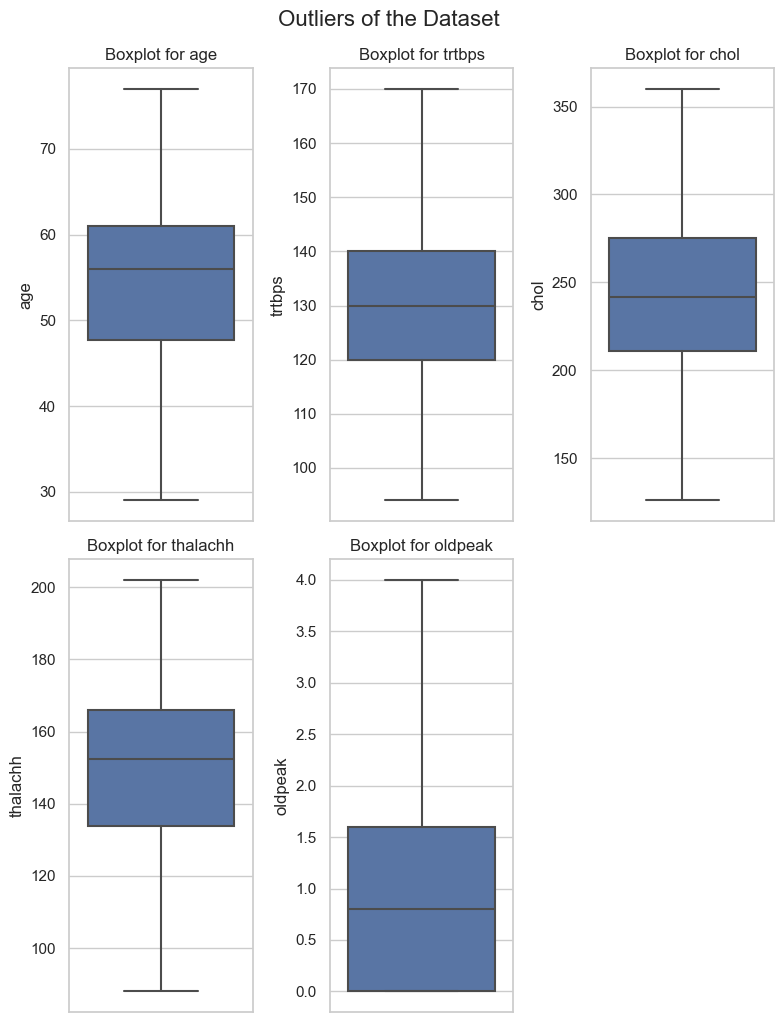

In [81]:
plt.figure(figsize=(8, 10))

for i, column in enumerate(df[con_cols], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.suptitle("Outliers of the Dataset ", y=1.02, fontsize=16)  # Thêm tiêu đề chung
plt.show()

2.5 Lưu tập dữ liệu sau khi đã tiền xử lý

In [82]:
# df.to_csv('heart_processed.csv', index=False)

# Phần 3: Mối tương quan của tập dữ liệu

3.1 Biểu đồ mật độ của các trường dữ liệu so với output

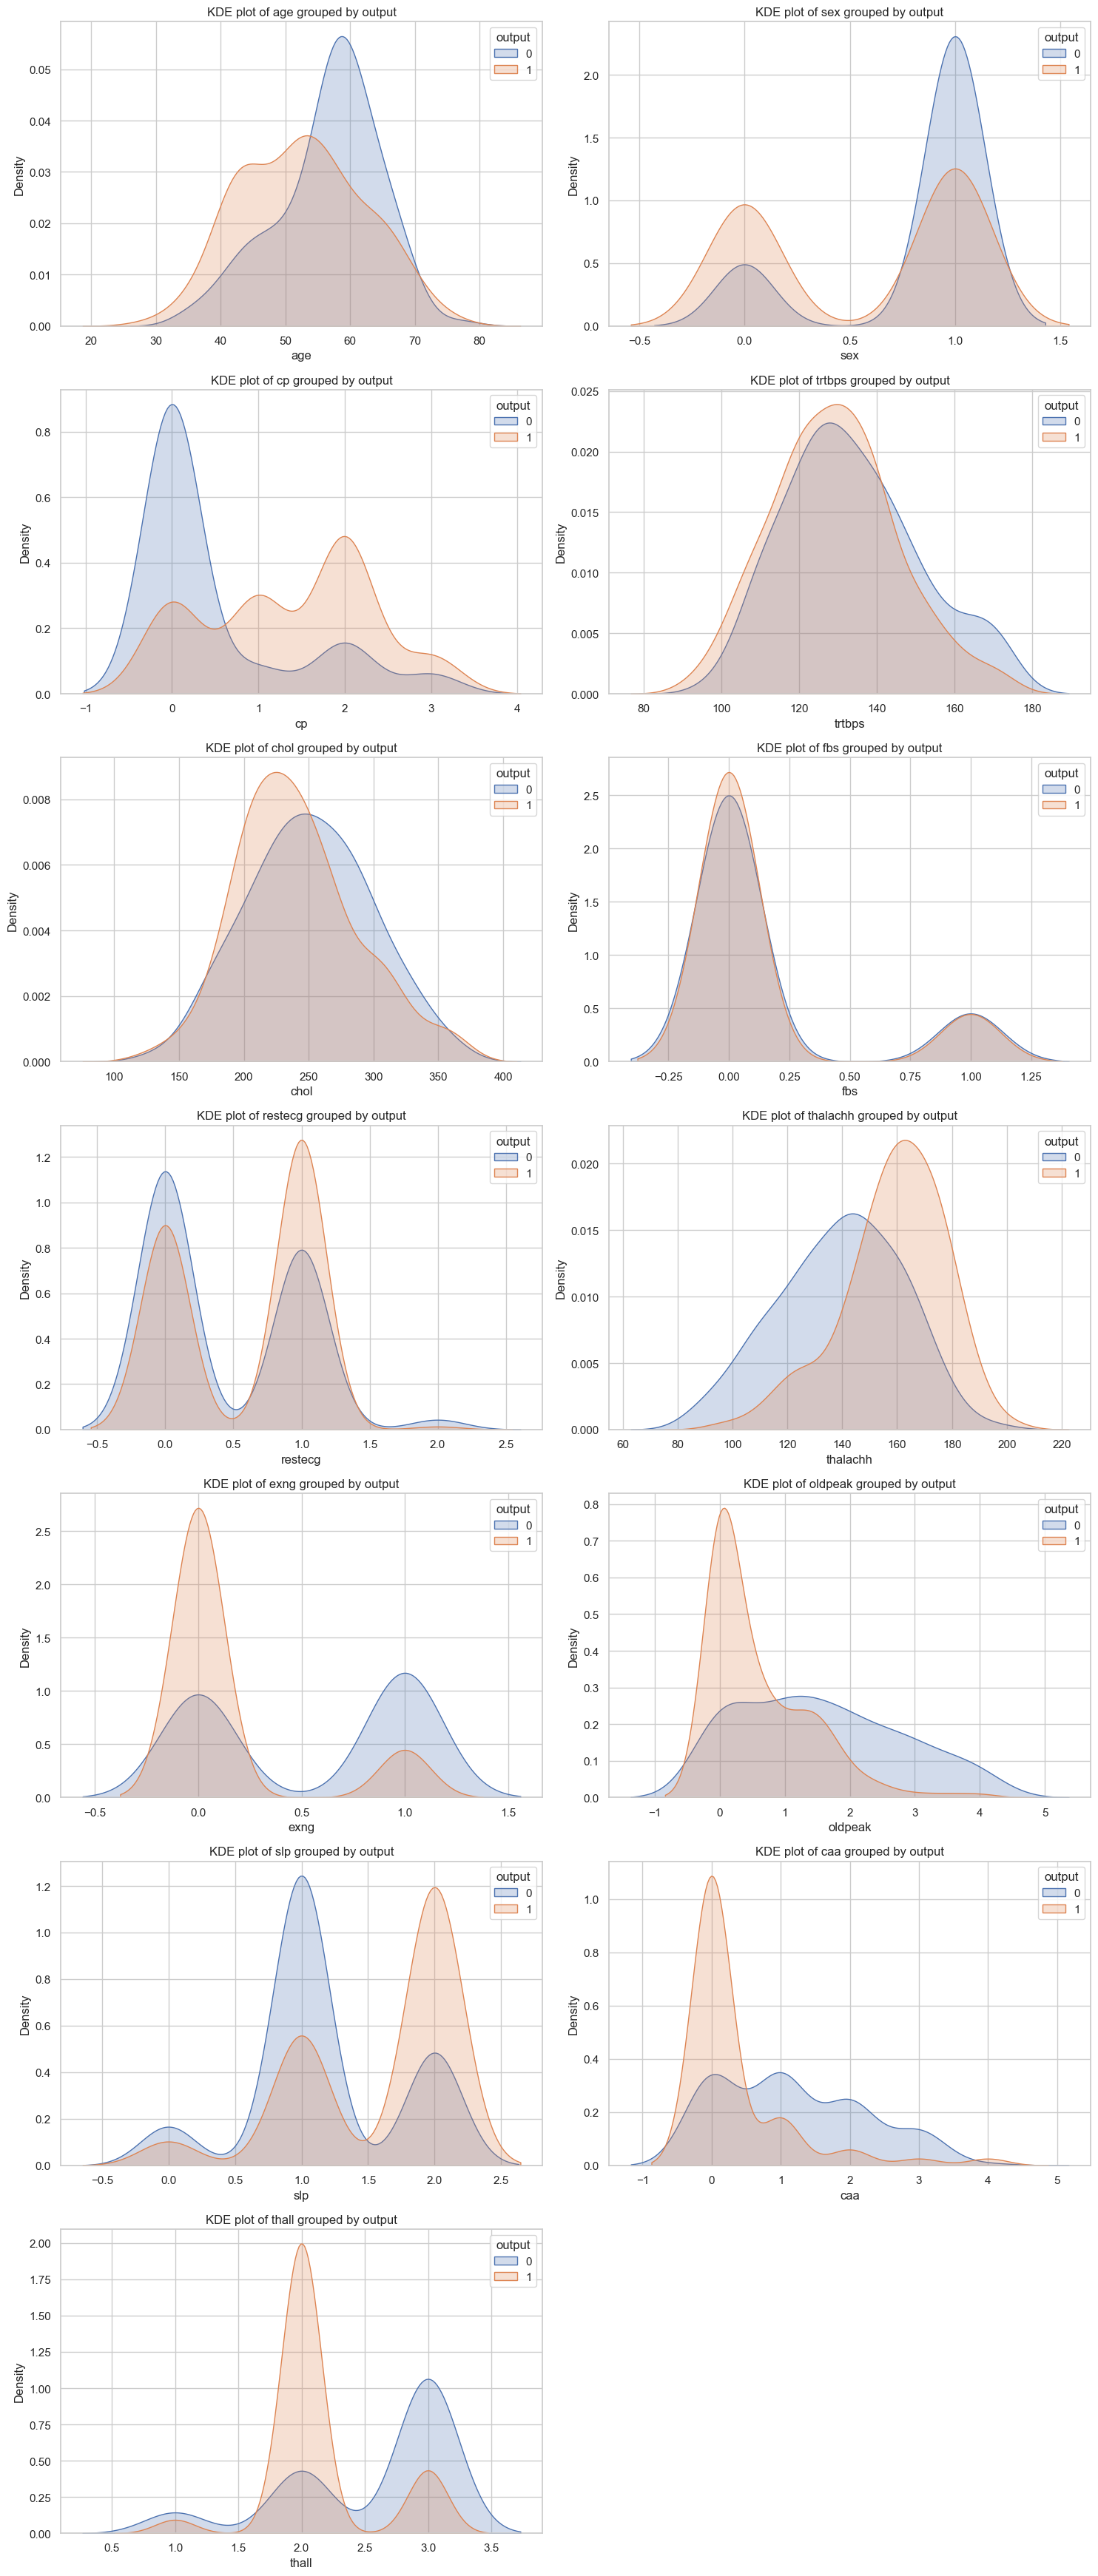

In [83]:
num_columns = len(df.columns) - 1  
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(15, 5*num_rows))


for i, column in enumerate(df.columns.drop('output')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['output'] == 0][column], label='0', fill=True)
    sns.kdeplot(data=df[df['output'] == 1][column], label='1', fill=True)
    plt.title(f'KDE plot of {column} grouped by output')
    plt.legend(title="output").set_alpha(None)

plt.tight_layout()
plt.show()


3.2 Biểu đồ thể hiện mức độ tương quan của toàn bộ tập dữ liệu

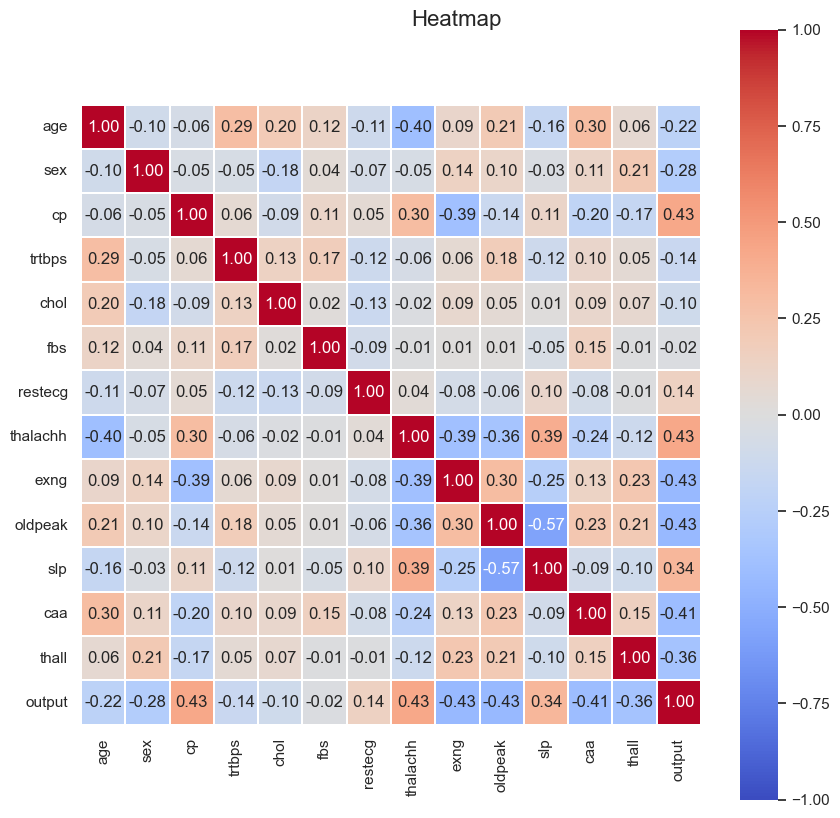

In [84]:
corr = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", linewidths=.1, square=True, annot=True ,fmt=".2f")
plt.yticks(rotation=0)
plt.suptitle("Heatmap", y=0.9, fontsize=16)  # Thêm tiêu đề chung
plt.show()

# Phần 4. Mô hình

4.1 Chuẩn bị mô hình

In [85]:
#Data Splitting
X = df.drop('output', axis=1)
y = df['output']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)
print(predictions)

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:00<00:00, 33.52it/s]

[LightGBM] [Info] Number of positive: 127, number of negative: 113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529167 -> initscore=0.116799
[LightGBM] [Info] Start training from score 0.116799
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

4.2 Xây dựng mô hình

4.2.1 Linear Regression

⭐ Độ chính xác và thời gian xử lý của mô hình

In [86]:
# Build Model
start_time = time.time()

model_lnr = LinearRegression()
model_lnr.fit(X_train, y_train)
y_pred_lnr = model_lnr.predict(X_test)

end_time = time.time()

model_lnr_time = end_time - start_time
model_lnr_mse = mean_squared_error(y_test, y_pred_lnr)
model_lnr_r2 = r2_score(y_test, y_pred_lnr)

print(f"MSE - Độ Lỗi Trung Bình Bình Phương: {round(model_lnr_mse, 4)}")
print(f"R² - Hệ số xác định: {round(model_lnr_r2, 4)}")
print(f"Thời gian xử lý mô hình: {round(model_lnr_time, 5)} giây")


MSE - Độ Lỗi Trung Bình Bình Phương: 0.1154
R² - Hệ số xác định: 0.519
Thời gian xử lý mô hình: 0.00314 giây


⭐ Biểu đồ trực quan hóa của mô hình

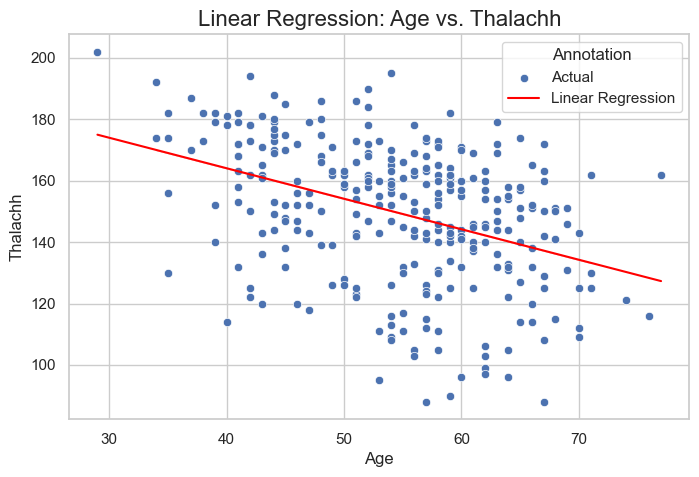

In [87]:
X_age = df['age'].values.reshape(-1, 1)
y_thalachh = df['thalachh'].values

# Huấn luyện mô hình Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_age, y_thalachh)

# Dự đoán giá trị
y_pred_thalachh = model_linear.predict(X_age)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_age.flatten(), y=y_thalachh, label='Actual')
sns.lineplot(x=X_age.flatten(), y=y_pred_thalachh, color='red', label='Linear Regression')
plt.title('Linear Regression: Age vs. Thalachh', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Thalachh')
plt.legend(title='Annotation')
plt.show()

4.2.2 Logistic Regression

⭐ Độ chính xác và thời gian xử lý của mô hình

In [88]:
start_time = time.time()

model_lgt = LogisticRegression(random_state=10)
model_lgt.fit(X_train, y_train)
y_pred_lgt = model_lgt.predict(X_test)

end_time = time.time()

model_lgt_time = end_time - start_time
model_lgt_accuracy = accuracy_score(y_test, y_pred_lgt)
classification_rep_lgt = classification_report(y_test, y_pred_lgt)
print(f'Độ chính xác: {model_lgt_accuracy}')
print(f"Thời gian xử lý mô hình: {round(model_lgt_time, 5)} giây")
print(f'Báo cáo phân loại:\n{classification_rep_lgt}')

Độ chính xác: 0.85
Thời gian xử lý mô hình: 0.01628 giây
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.86      0.89      0.88        36

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



⭐ Biểu đồ trực quan hóa của mô hình

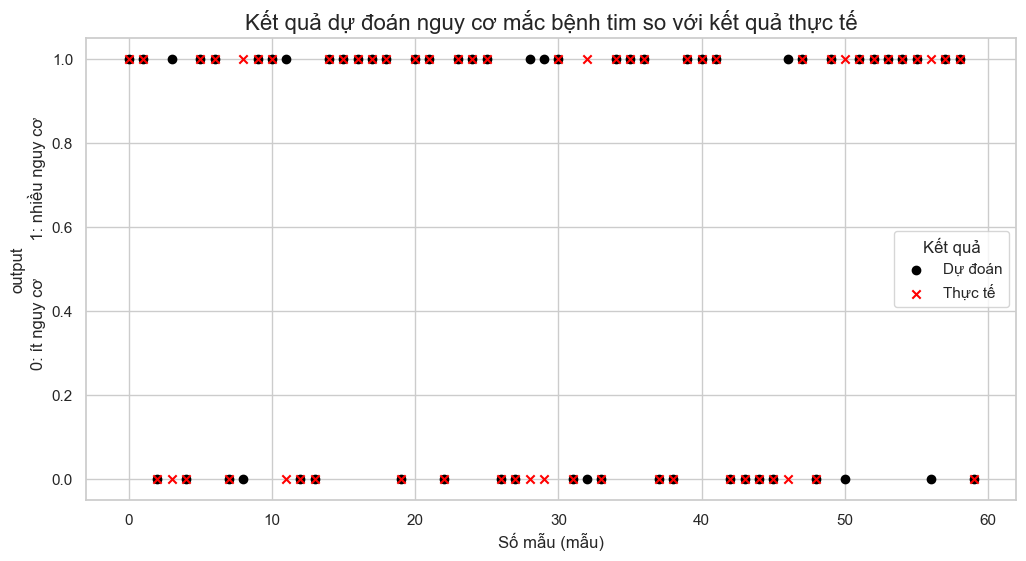

In [89]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_pred_lgt)),y_pred_lgt,color="black",label="Dự đoán")
plt.scatter(range(len(y_test)),y_test,color="red", marker="x",label="Thực tế")
plt.title("Kết quả dự đoán nguy cơ mắc bệnh tim so với kết quả thực tế", fontsize=16)
plt.xlabel("Số mẫu (mẫu)")
plt.ylabel("""output
           0: ít nguy cơ        1: nhiều nguy cơ""")
plt.legend(title="Kết quả")
plt.show()

4.2.3 Support Vector Machines

⭐ Độ chính xác và thời gian xử lý của mô hình

In [90]:
start_time = time.time()

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

end_time = time.time()

model_svm_time = end_time - start_time
model_svm_accuracy = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print(f'Độ chính xác: {model_svm_accuracy}')
print(f"Thời gian xử lý mô hình: {round(model_svm_time, 5)} giây")
print(f'Báo cáo phân loại:\n{classification_rep_svm}')

Độ chính xác: 0.7833333333333333
Thời gian xử lý mô hình: 0.0 giây
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.83      0.81      0.82        36

    accuracy                           0.78        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



⭐ Biểu đồ trực quan hóa của mô hình

4.2.4 K Nearest Neighbours

⭐ Độ chính xác và thời gian xử lý của mô hình

In [91]:
best_k = None
best_accuracy = 0

for k in range(1, 21):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    model_knn_accuracy = accuracy_score(y_test, y_pred_knn)

    if model_knn_accuracy > best_accuracy:
        best_accuracy = model_knn_accuracy
        best_k = k

print(f'K tốt nhất là {best_k} với độ chính xác {best_accuracy}')

model_knn_best = KNeighborsClassifier(n_neighbors=best_k)
model_knn_best.fit(X_train, y_train)
y_pred_knn_best = model_knn_best.predict(X_test)

classification_rep_knn_best = classification_report(y_test, y_pred_knn_best)
print(f'Báo cáo phân loại với k tốt nhất:\n{classification_rep_knn_best}')


K tốt nhất là 3 với độ chính xác 0.8333333333333334
Báo cáo phân loại với k tốt nhất:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.88      0.83      0.86        36

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



⭐Biểu đồ trực quan hóa của mô hình

4.2.5 K Nearest Neighbours

⭐ Độ chính xác và thời gian xử lý của mô hình

In [92]:
start_time = time.time()

model_bnb = BernoulliNB()
model_bnb.fit(X_train, y_train)
y_pred_bnb = model_bnb.predict(X_test)

end_time = time.time()

model_bnb_time = end_time - start_time
model_bnb_accuracy = accuracy_score(y_test, y_pred_bnb)
classification_rep_bnb = classification_report(y_test, y_pred_bnb)
print(f'Độ chính xác: {model_bnb_accuracy}')
print(f"Thời gian xử lý mô hình: {round(model_bnb_time, 5)} giây")
print(f'Báo cáo phân loại:\n{classification_rep_bnb}')



Độ chính xác: 0.9166666666666666
Thời gian xử lý mô hình: 0.0043 giây
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.94      0.92      0.93        36

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60

